# Análise e Predição de risco Ataque Cardíaco

#### **Aluno:** Moises Ferreira de Souza
#### **Orientadora:** Manoela Kohler
---
Trabalho apresentado ao curso [BI MASTER](https://ica.puc-rio.ai/bi-master) como pré-requisito para conclusão de curso e obtenção de crédito na disciplina "Projetos de Sistemas Inteligentes de Apoio à Decisão".


### **Resumo**
Um ataque cardíaco ocorre quando uma artéria que fornece sangue e oxigênio ao coração fica bloqueada. Os depósitos de gordura se acumulam com o tempo, formando placas nas artérias do coração. Se uma placa se romper, um coágulo de sangue pode se formar e bloquear suas artérias, causando um ataque cardíaco.

O objetivo deste trabalho é criar um classificador para predizer se um paciente tem baixo ou alto risco de ataque cardíaco com base em informações clínicas.

O dataset utilizado neste trabalho é público e disponível no [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) com informações clinicas de pacientes e o respectivo diagnóstico médico de baixo ou alto risco de ataque cardíaco.

A metodologia utilizada consiste em realizar uma análise exploratória dos dados, tratamento dos dados, experimentação de diversos modelos de classificação e análise dos resultados e hiperparâmetros.

<br>

### **Introdução**

Um enfarte agudo do miocárdio ou infarto agudo do miocárdio, vulgarmente denominado ataque cardíaco, ocorre quando a circulação de sangue para uma parte do coração é interrompida, causando lesões no músculo cardíaco.

Antes do infarto ocorrer vários sintomas e informações clínicas indicam se o paciente está com baixo ou alto risco. Este trabalho, tem por objetivo realizar uma análise exploratória e um classificador com base em um conjunto de informações dos pacientes utilizando um dataset disponível no [kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

A primeira parte do trabalho consiste em realizar análise exploratória e tratamento dos dados como tratamento de missing values, aplicação de normalização, redução de dimensionalidade e seleção de atributos. Também será verificado se há necessidade de aplicar balanceamento nos dados e remoção de outliers.

A segunda parte do trabalho consiste na modelagem e uso de diversos modelos de aprendizagem supervisionada. Nesta etapa será realizado uma busca e tuning dos melhores hiperparâmetros de cada modelo que melhor se adequa ao problema.

Este trabalho utiliza a linguagem python e como principais bibliotecas o scikit-learn para modelagem e seaborn para visualização dos dados.

<br>

**Descição dos atributos o dataset:**

**age**: Idade do paciente

**sex**: sexo do paciente

**cp**: tipo de dor torácica, 0 = angina típica, 1 = angina atípica, 2 = dor não anginosa, 3 = assintomática

**trtbps**: pressão arterial em repouso (em mm Hg)

**chol**: colesterol em mg / dl obtido por meio do sensor de IMC

**fbs**: (açúcar no sangue em jejum> 120 mg / dl), 1 = Verdadeiro, 0 = Falso

**restecg**: Resultados eletrocardiográficos em repouso, 0 = normal, 1 = normalidade da onda ST-T, 2 = hipertrofia ventricular esquerda

**thalachh**: frequência cardíaca máxima alcançada

**oldpeak**: pico anterior

**slp**: declive

**caa**: Número de vasos principais

**thall**: resultado do teste de estresse com tálio ~ (0,3)

**exng**: Angina induzida por exercício ~ 1 = Sim, 0 = Não

**output**: classificação (0- baixo, 1 - alto)







# Carga das Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, Normalizer
from sklearn.decomposition import PCA, NMF

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Carga e verificação do dataset

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.shape

(303, 14)

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.dtypes.value_counts()

int64      13
float64     1
dtype: int64

# Análise exploratória dos dados

## Separando as variáveis em categóricas e numéricas

Verifica os valores únicos por característica.

In [ ]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


A análise acima evidencia que apesar de algumas características serem númericas, na verdade são categóricas codificadas em números. Como, por exemplo, a variável **sex**.

In [ ]:
cat_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
num_features = ["age","trtbps","chol","thalachh","oldpeak"]

print("Características categóricas ({total}) \n {colunas}\n".format(total = len(cat_features), colunas = cat_features))
print("Características numéricas ({total}) \n {colunas}\n".format(total = len(num_features), colunas = num_features))

Características categóricas (8) 
 ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

Características numéricas (5) 
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']



## Transformando as características categóricas em tipos categóricos

In [ ]:
for col in cat_features:
    data[col] = data[col].fillna(data[col].mode()[0]).astype('category').cat.codes
    
data['output'] = data['output'].astype('category').cat.codes

## Análise de missing values

Não há missing values no dataset

In [ ]:
import missingno as msno

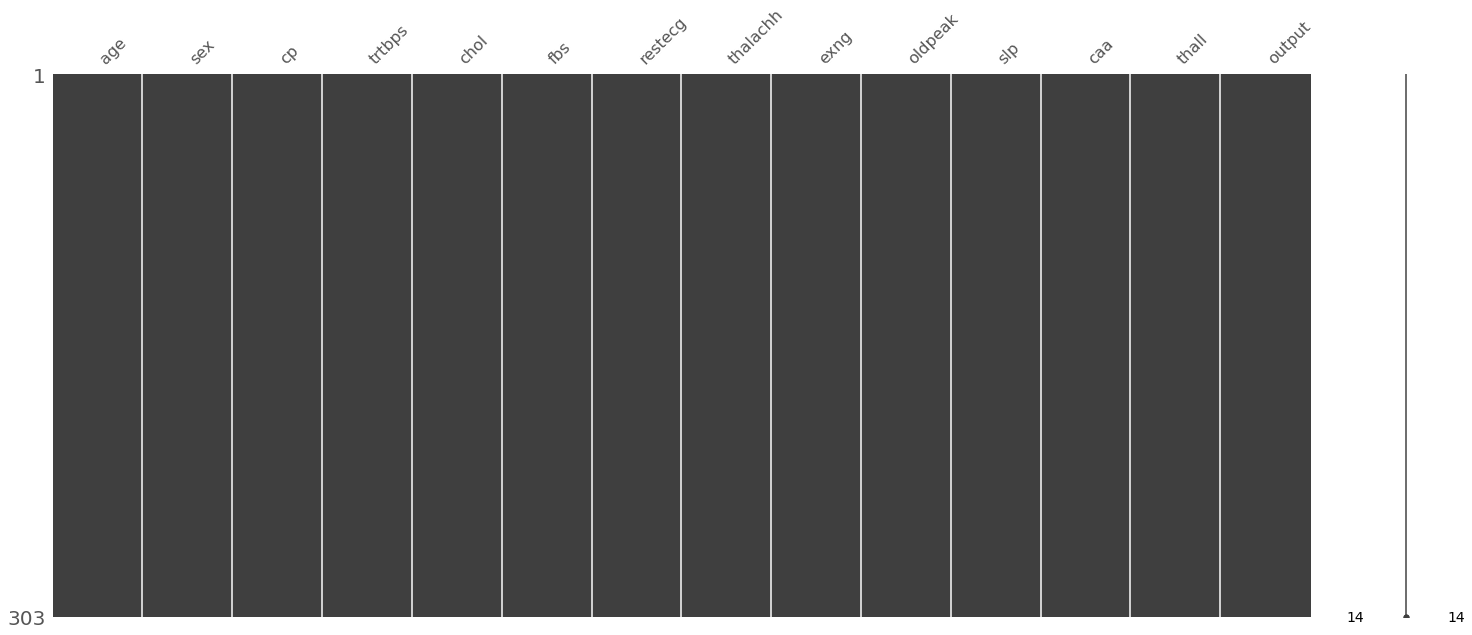

In [ ]:
msno.matrix(data)

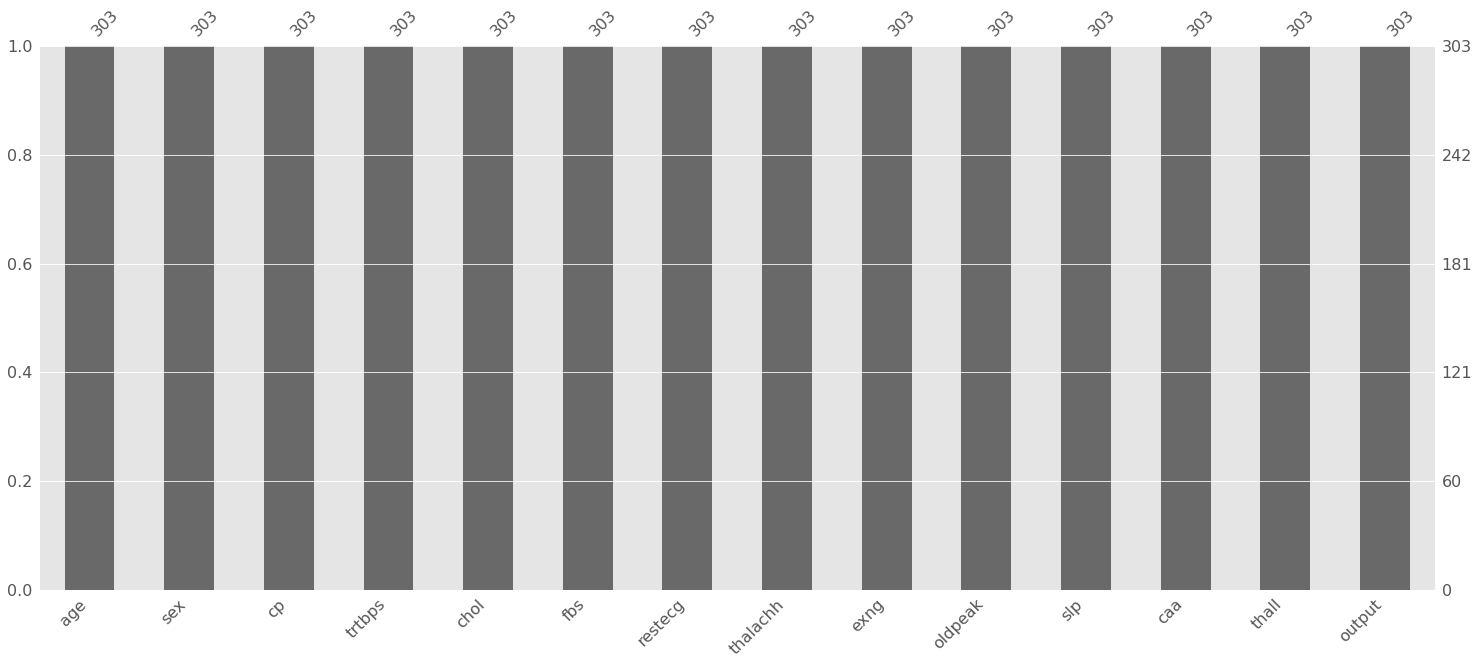

In [ ]:
msno.bar(data)

## Verificando o balanceamento dos dados

O gráfico indica que os dados estão balanceados para as classes **0** (Baixo risco de ataque cardíaco) e **1** (Alto risco de ataque cardíaco).

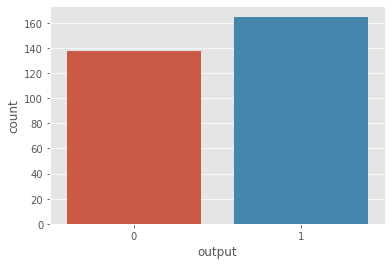

In [ ]:
sns.countplot(x='output', data=data)

## Análise de correlação

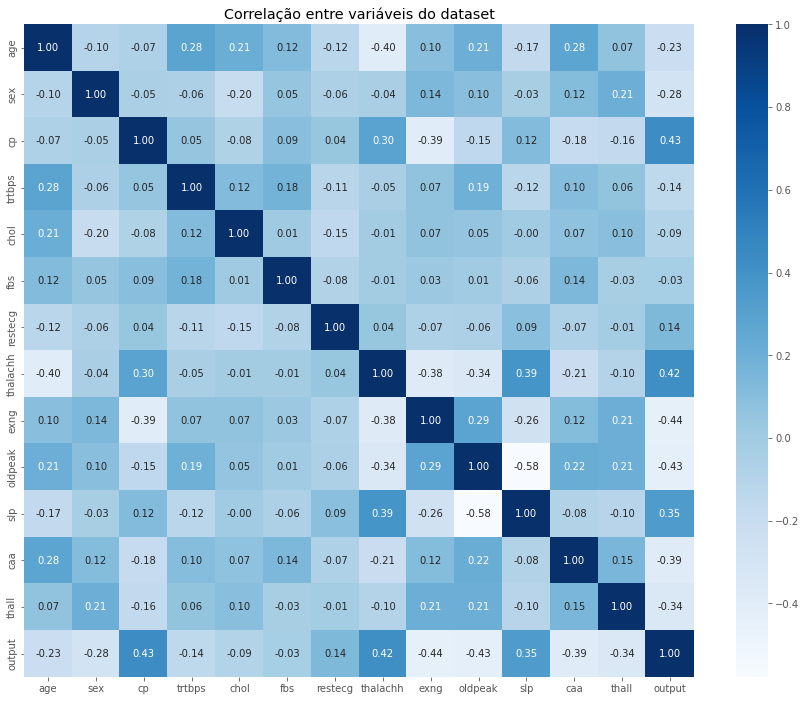

Correlação com outcome em ordem decrescente
output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


In [ ]:
train_corr = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(train_corr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

corr_values=train_corr['output'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlação com outcome em ordem decrescente")
print(abs(corr_values).sort_values(ascending=False))

É possível verificar que algumas características possuem baixa correlação com a variável dependente (baixa ou alto risco de ataque cardíaco). Os atributos **fbs**, **chol**, **restecg** e **trtbps** possívelmente não serão considerados para o modelo. 
A seguir todas as variáveis serão testadas estatisticamente utilizando os testes **ANOVA** e **CHI SQUARE**, analisadas graficamente e posteriormente os piores atributos serão removidos.

## Análise de atributos numéricos pelo método **ANOVA**
A partir da análise ANOVA, alguns atributos de menor e maior relevância foram analisadas.

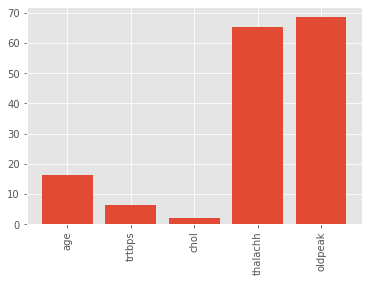

In [ ]:
data_anova = data[num_features]

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(data_anova, data['output'])

#for i in range(len(fs.scores_)):
#    print('%s: %f' % (cat_columns[i], fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(list(range(len(num_features))),list(num_features),rotation='vertical')
plt.show()

### Análise da variável chol

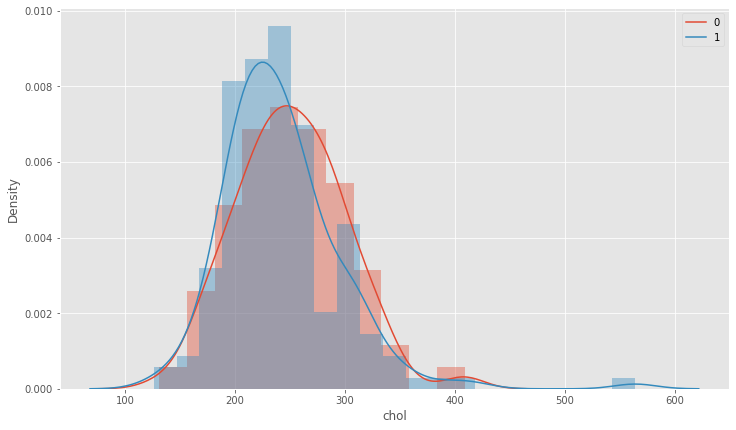

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])

sns.distplot(data[data['output'] == 0]['chol'], ax=ax, kde=True)
sns.distplot(data[data['output'] == 1]['chol'], ax=ax, kde=True)
ax.legend([0,1])

A distribuição se aproxima de uma normal. Não há grande diferença nas duas curvas e, portanto, a variável **chol** não é útil para predizer os casos de baixo ou alto risco de ataque cardíaco. Confirma, desta maneira, o resultado obtido ao analisar a correlação com a variável dependente.  Está varável não será selecionada para o modelo.

### Análise da variável trtbps

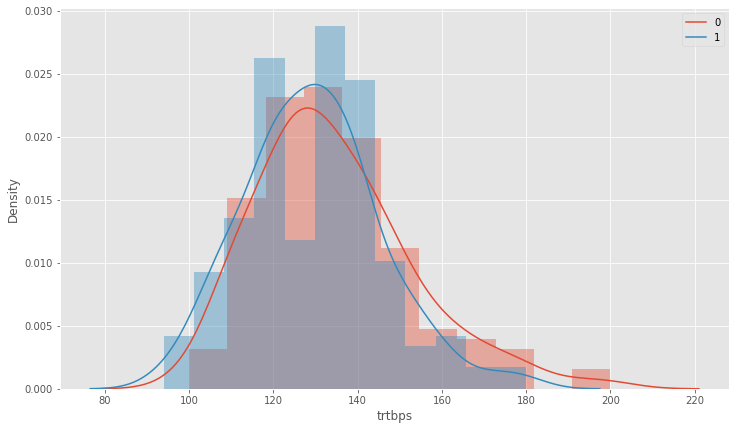

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])

sns.distplot(data[data['output'] == 0]['trtbps'], ax=ax, kde=True)
sns.distplot(data[data['output'] == 1]['trtbps'], ax=ax, kde=True)
ax.legend([0,1])

A variável **trtbps** tem o mesmo comportamento da variável **chol**. Esta variável não será selecionada para o modelo pelos mesmos motivos da variável **chol**.

### Análise das variáveis thalachh e oldpeak

Por outro lado, as variáveis **thalachh** e **oldpeak** foram as que tiveram melhor score no teste ANOVA e serão utilizadas no modelo. O gráfico de dipersão abaixo ilustra a relação entre as duas variáveis.

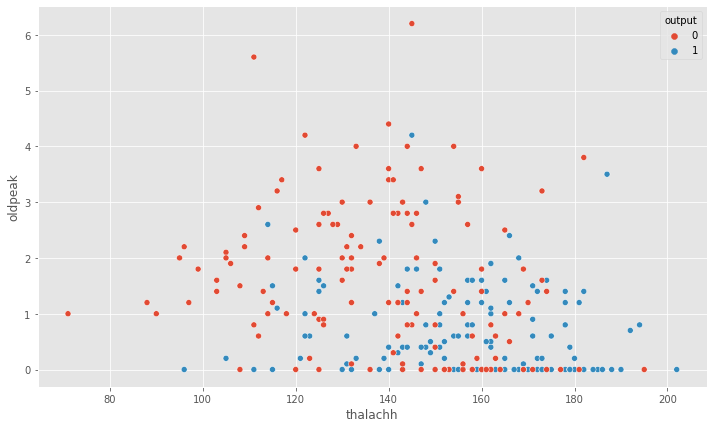

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])
sns.scatterplot(x='thalachh',y='oldpeak', data=data, hue='output', ax= ax)

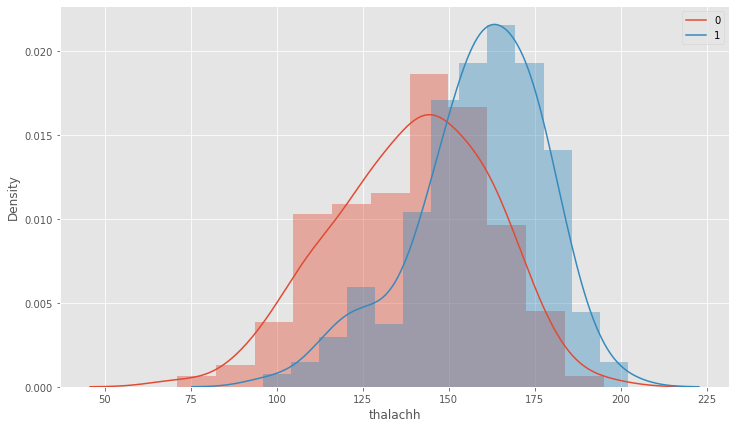

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])

sns.distplot(data[data['output'] == 0]['thalachh'], ax=ax, kde=True)
sns.distplot(data[data['output'] == 1]['thalachh'], ax=ax, kde=True)
ax.legend([0,1])

Pessoas com maior frequência cardiaca (**thalachh**) têm mais risco.

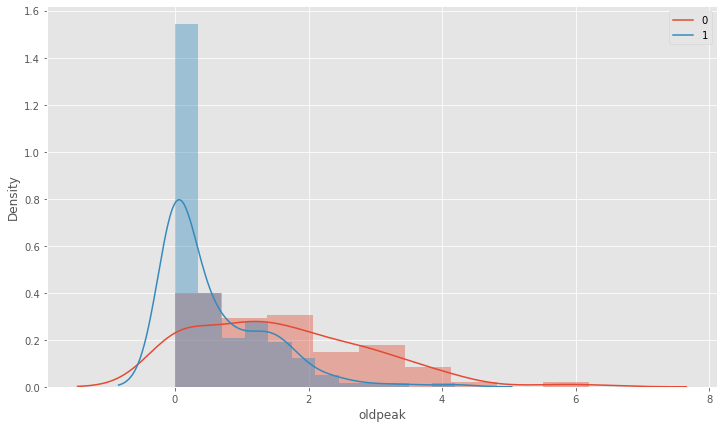

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])

sns.distplot(data[data['output'] == 0]['oldpeak'], ax=ax, kde=True)
sns.distplot(data[data['output'] == 1]['oldpeak'], ax=ax, kde=True)
ax.legend([0,1])

Pessoas com menor **oldpeak** têm mais risco.  

## Análise de outlier dos atributos numéricos selecionados

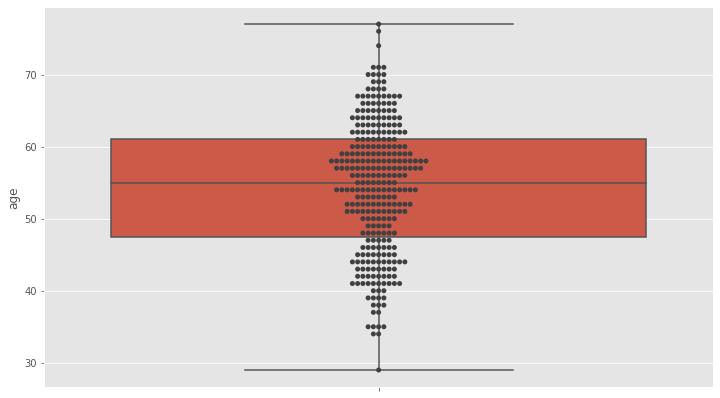

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])
ax = sns.boxplot(y="age", data=data, ax=ax)
ax = sns.swarmplot(y="age", data=data, color=".25", ax=ax)

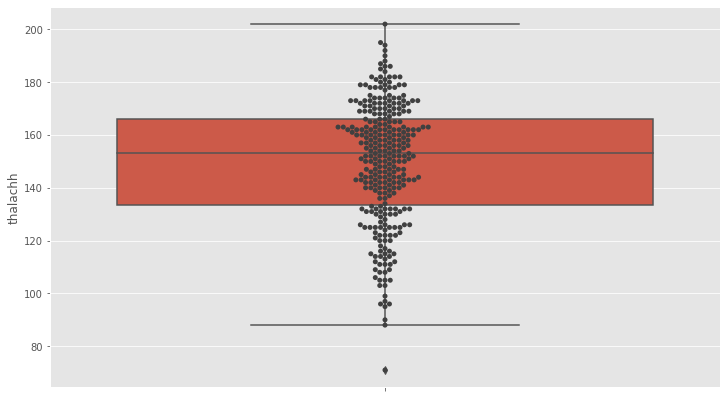

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])
ax = sns.boxplot(y="thalachh", data=data)
ax = sns.swarmplot(y="thalachh", data=data, color=".25")

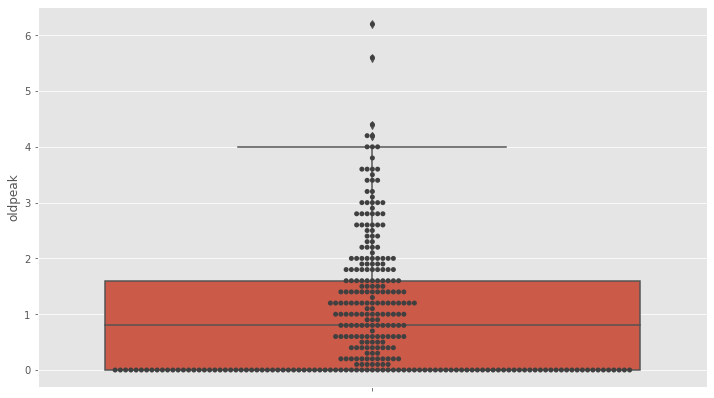

In [ ]:
fig,ax =plt.subplots(1,1, figsize=[12,7])
ax = sns.boxplot(y="oldpeak", data=data)
ax = sns.swarmplot(y="oldpeak", data=data, color=".25")

Remoção dos outliers

In [ ]:
data = data[data['oldpeak'] < 5]
data = data[data['thalachh'] > 80]

## Pairplot variáveis numéricas selecionadas.

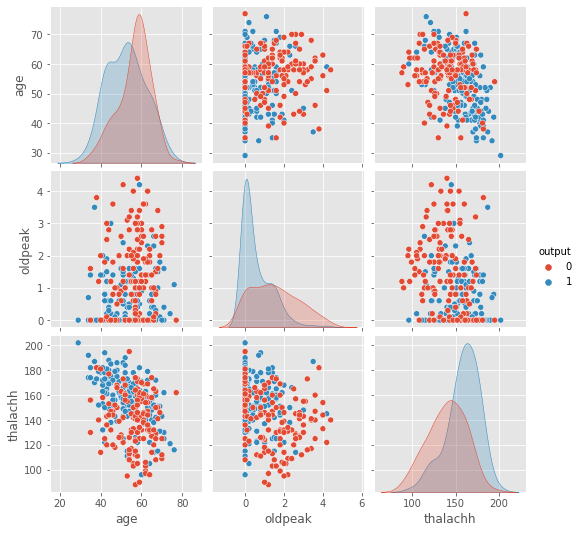

In [ ]:
data_pairplot = data[['age', 'oldpeak', 'thalachh']]
data_pairplot['output'] = data['output']
sns.pairplot(data_pairplot, hue='output')

## Análise de atributos categóricos pelo método **Chi Square**

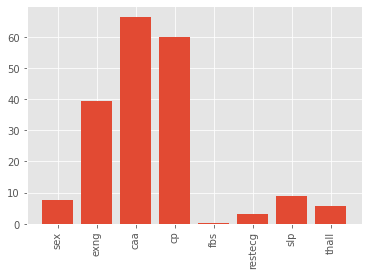

In [ ]:
data_chi2 = data[cat_features]

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(data_chi2, data['output'])

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(list(range(len(cat_features))),list(cat_features),rotation='vertical')
plt.show()

### Análise das variáveis fbs e restecg

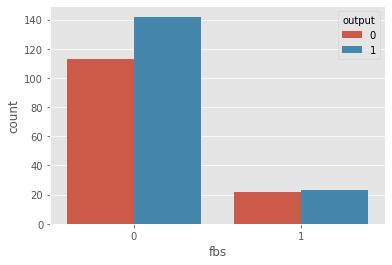

In [ ]:
sns.countplot(x='fbs', hue='output', data=data)

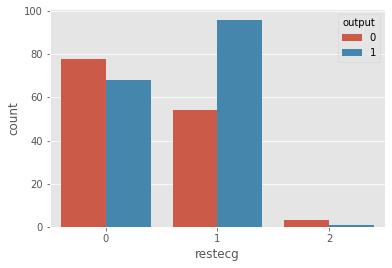

In [ ]:
sns.countplot(x='restecg', hue='output', data=data)

Os dois atributos explicam muito pouco a variável dependente. Apesar do atributo **restecg** ser um pouco melhor, não será considerado também. Os resultados aqui mais uma vez vão de encontro a avaliação de correlação realizada anteriormente.

Por outro lado, é pssível verificar como variáveis com maior score são bem melhores em predizer a variável dependente como é o caso das variáveis ilustradas nos gráficos abaixo

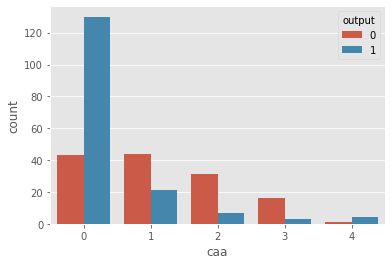

In [ ]:
sns.countplot(x='caa', hue='output', data=data)

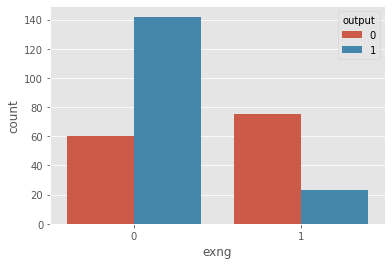

In [ ]:
sns.countplot(x='exng', hue='output', data=data)

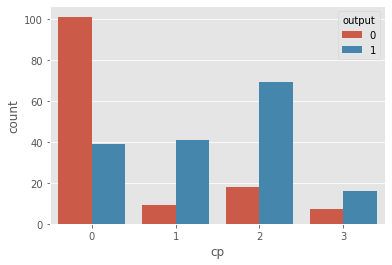

In [ ]:
sns.countplot(x='cp', hue='output', data=data)

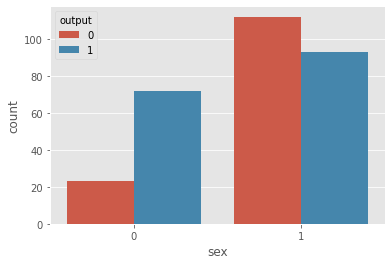

In [ ]:
sns.countplot(x='sex', hue='output', data=data)

## Pairplot variáveis categóricas selecionadas.


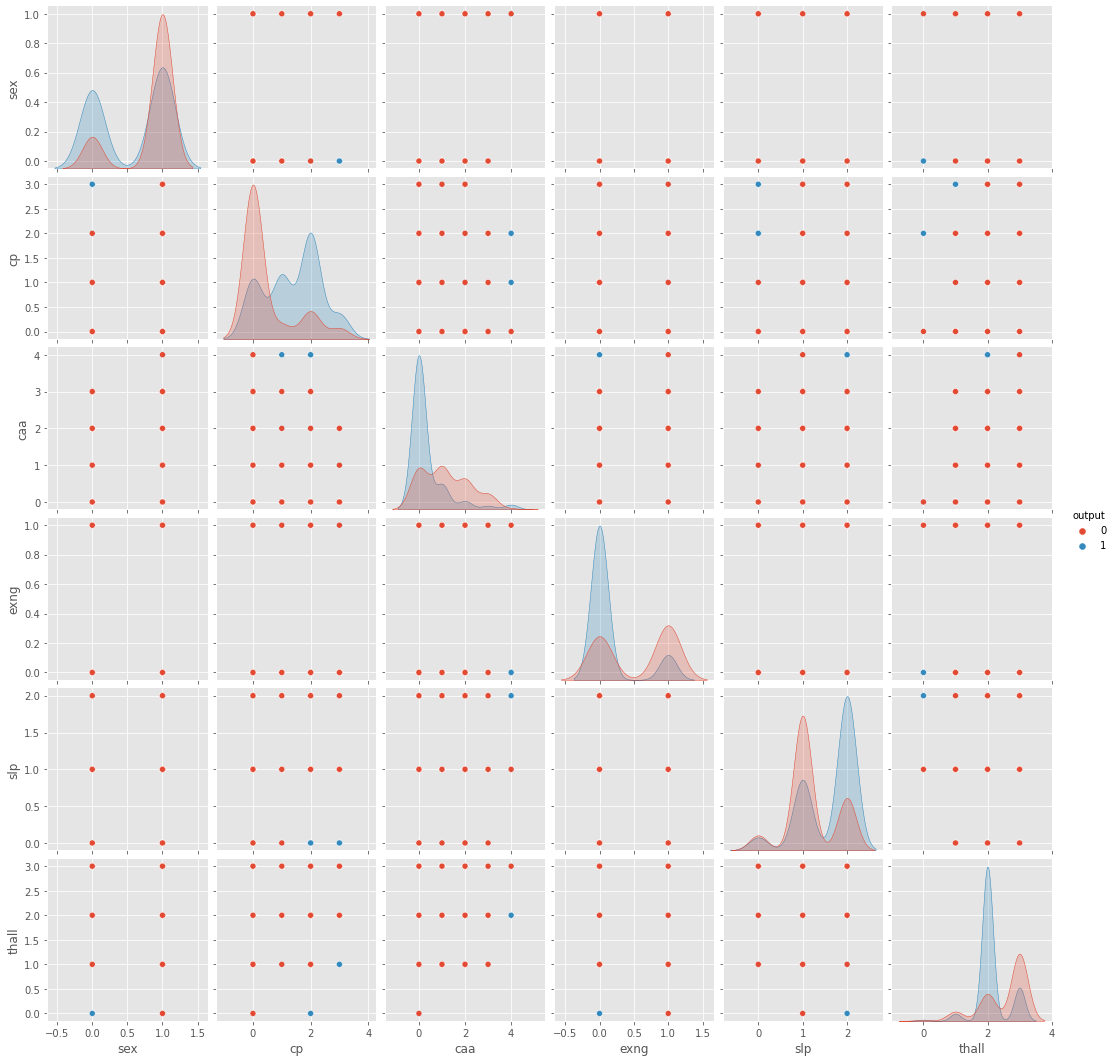

In [ ]:
data_pairplot = data[['sex', 'cp', 'caa', 'exng', 'slp', 'thall']]
data_pairplot['output'] = data['output']
sns.pairplot(data_pairplot, hue='output')

# Conclusões da análise exploratória dos dados

* Não há missing values.
* Variáveis **chol**, **trtbps**,  **fbs** e **restecg** têm baixa correlação e significância estatística com a prossibilidade de ataque cardíaco. 
* Outliers das variáveis **thalachh** e **oldpeak** foram removidos.
* Não há relação linear entre as variáveis númericas selecionadas.
* Como de se esperar, pessoas mais velhas possuem mais risco de ataque cardíaco.
* Pessoas com maior frequência cardiaca (**thalachh**) têm mais risco.
* Pessoas com menor **oldpeak** têm mais risco.  
* Pessoas com dores **cp** = 2 têm maior chance de ataque cardíaco.
* Pessoas com **caa** = 0 têm maior chance de ataque cardíaco.
* Pessoas com **sex** = 1 (provavelmente homens) têm maior chance de ataque cardíaco.
* Pessoas com **enxg** = 0 têm maior chance de ataque cardíaco.
* Pessoas com **thall** = 2 têm maior chance de ataque cardíaco.



# Feature Selection

Como analisado, as features **chol**, **trtbps**,  **fbs** e **restecg** serão removidas.

In [ ]:
num_features.remove('chol')
num_features.remove('trtbps')
cat_features.remove('fbs')
cat_features.remove('restecg')

# Construindo os conjuntos de treino e teste

In [ ]:
X = data[num_features + cat_features]
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Modelo de classificação

O seguintes modelos de classificação serão testados:
- **Decision Tree**
- **XGBoost**
- **KNN**
- **Random Forest**
- **SVM**
- **Logistic Regression**

Para realizar o pré-processamento dos dados tanto de treino quanto de teste aerá utilizado uma abordagem de **pipeline** do python de processamento e transformação dos dados.  

Os missing values de dados categóricos serão substituídos pela **moda** enquanto que para as features numéricas a **mediana**.

Os atributos categóricos foram codificadas em números através da técnica **one hot encoding**, removendo uma das colunas para eliminar a **multicolinearidade** dos dados.

Apesar da análise e redução de variáveis realizada anteriormente, para todos os modelos uma nova redução de dimensão será aplicada ao pipeline de modo a extrair as features relevantes para cada modelo. Para os modelos de **Decision Tree** e **XGBoost** será aplicado uma redução baseada no teste **anova** para dados numéricos e **chi square** para dados categóricos. Para **KNN**, **SVM** e **Logistic Regression** o **PCA** e para **Random Forest** nenhuma redução de dimensionalidade será aplicada.

Para os modelos que são mais sensíveis a grandeza dos atributos ou que utilizaram PCA para redução da dimensionalidade será aplicado a normalização dos dados: KNN, SVM e Logistic Regression. A padronização Z score foi a que trouxe melhores resultados.

Uma busca exaustiva, utilizando o **GridSearchCV**, será utilizada para melhor escolher o tamanho da redução da dimensionalidade e os **hiperparâmetros** dos modelos.

Por fim, será utilizado **cross validation** com 3 folds (**k-fold**).

## Configuração de Cross Validation

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

## Decision Tree e XGBoost

### Pipeline com Pré-Processamento

Para estes modelos não foi realizado normalização dos dados.

In [ ]:
num_transformer_anova = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('dim_reduction', SelectKBest(score_func=f_classif)),
])

cat_transformer_chi2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot encoder', OneHotEncoder(handle_unknown='ignore')),
    ('dim_reduction', SelectKBest(score_func=chi2)),
])


preprocessor_chi2_anova = ColumnTransformer(transformers=[
    ('num', num_transformer_anova, num_features),
    ('cat', cat_transformer_chi2, cat_features),
])

dim_reduction_parameters = {'preprocessor__cat__dim_reduction__k':range(4, 6, 1),
                            'preprocessor__num__dim_reduction__k':range(2, 3, 1)}

### Decision Tree

In [ ]:
parameters = {'tree__max_depth': [3, 4, 5, 10],
              'tree__criterion': ['gini', 'entropy'],
              'tree__min_samples_leaf': [1, 2],
              'tree__min_samples_split': [2, 4],
              'tree__min_impurity_decrease': [1, 0, 0.1, 0.01],
             }

parameters.update(dim_reduction_parameters)

model_DecisionTree = Pipeline(steps=[
    ('preprocessor', preprocessor_chi2_anova),
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

In [ ]:
grid = GridSearchCV(model_DecisionTree, param_grid=parameters, cv=kfold, n_jobs=-1)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'preprocessor__cat__dim_reduction__k': 4,
 'preprocessor__num__dim_reduction__k': 2,
 'tree__criterion': 'entropy',
 'tree__max_depth': 3,
 'tree__min_impurity_decrease': 0,
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2}

In [ ]:
grid.best_score_

0.8041666666666667

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.78      0.78      0.78        32

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[21  7]
 [ 7 25]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.53125


In [ ]:
decision_tree_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

### XGBoost

In [ ]:
parameters = {
    'XGBoost__max_depth': range (5, 10, 1),
    'XGBoost__n_estimators': range(60, 220, 40),
    'XGBoost__learning_rate': [0.1, 0.01, 0.05]
}

parameters.update(dim_reduction_parameters)

model_XGBoost = Pipeline(steps=[
    ('preprocessor', preprocessor_chi2_anova),
    ('XGBoost', XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42))
])

In [ ]:
grid = GridSearchCV(model_XGBoost, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'XGBoost__learning_rate': 0.05,
 'XGBoost__max_depth': 5,
 'XGBoost__n_estimators': 60,
 'preprocessor__cat__dim_reduction__k': 4,
 'preprocessor__num__dim_reduction__k': 2}

In [ ]:
grid.best_score_

0.8166666666666668

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.84      0.84      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[23  5]
 [ 5 27]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.6651785714285714


In [ ]:
xgboost_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

## KNN, SVM e Logistic Regression

### Pipeline com Pré-Processamento

Para estes modelos foi realizado normalização dos dados utilizando a padronização Z score.

In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('normalizer', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot encoder', OneHotEncoder(handle_unknown='ignore', sparse=True))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
])

reduce_dim_parameters = {'reduce_dims__n_components' : [2, 4, 8, 12, 16, 20, 24]}

### KNN

In [ ]:
parameters = {
    'knn__leaf_size': list(range(1,10)),
    'knn__n_neighbors': list(range(1,6)),
    'knn__p': [2],
    'knn__weights': ['uniform', 'distance'] 
}

parameters.update(reduce_dim_parameters)

model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reduce_dims', PCA(iterated_power=7)),
    ('knn', KNeighborsClassifier())
])

In [ ]:
grid = GridSearchCV(model_knn, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True, refit=True)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'knn__leaf_size': 1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'reduce_dims__n_components': 12}

In [ ]:
grid.best_score_

0.8458333333333333

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[23  5]
 [ 4 28]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.697986577181208


In [ ]:
knn_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

### SVM

In [ ]:
parameters = {
    'svm__C': np.arange(1,10,1), 
    'svm__gamma': [5, 3, 2, 1, 0.1, 0.01, 0.001, 0.0001], 
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

parameters.update(reduce_dim_parameters)

model_SVM = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reduce_dims', PCA(iterated_power=7)),
    ('svm', SVC())
])

In [ ]:
grid = GridSearchCV(model_SVM, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'reduce_dims__n_components': 12,
 'svm__C': 4,
 'svm__gamma': 0.1,
 'svm__kernel': 'rbf'}

In [ ]:
grid.best_score_

0.875

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.90      0.88      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[25  3]
 [ 4 28]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.7661469933184855


In [ ]:
SVM_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

### Logistic Regression

In [ ]:
parameters = {
    'logistic_regression__C': np.logspace(0, 4, 10), 
    'logistic_regression__penalty': ['l1', 'l2'],
    'logistic_regression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic_regression__max_iter': [300]
}

parameters.update(reduce_dim_parameters)

model_logistc_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reduce_dims', PCA(iterated_power=7)),
    ('logistic_regression', LogisticRegression())
])

In [ ]:
grid = GridSearchCV(model_logistc_regression, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'logistic_regression__C': 2.7825594022071245,
 'logistic_regression__max_iter': 300,
 'logistic_regression__penalty': 'l2',
 'logistic_regression__solver': 'newton-cg',
 'reduce_dims__n_components': 12}

In [ ]:
grid.best_score_

0.8583333333333334

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[24  4]
 [ 3 29]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.7651006711409396


In [ ]:
logistic_regression_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

## Random Forest

In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)])

In [ ]:
parameters = {
    'forest__n_estimators': [100, 300, 500, 800],
    'forest__max_depth': [5, 8, 15, 25],
    'forest__min_samples_split': [2, 5, 10, 15, 100],
    'forest__min_samples_leaf': [1, 2, 5]
}

model_RandomForest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(
        random_state = 1,
        n_estimators = 750,
        max_depth = 15, 
        min_samples_split = 5,  min_samples_leaf = 1))
])

In [ ]:
grid = GridSearchCV(model_RandomForest, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True)
grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [ ]:
grid.best_params_

{'forest__max_depth': 5,
 'forest__min_samples_leaf': 1,
 'forest__min_samples_split': 2,
 'forest__n_estimators': 800}

In [ ]:
grid.best_score_

0.8541666666666666

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[23  5]
 [ 4 28]]


In [ ]:
print(cohen_kappa_score(y_test,grid_predictions))

0.697986577181208


In [ ]:
random_forest_results = [
    grid.best_score_, 
    accuracy_score(y_test,grid_predictions),
    cohen_kappa_score(y_test,grid_predictions),
    precision_score(y_test,grid_predictions, pos_label=0),
    precision_score(y_test,grid_predictions, pos_label=1),
    recall_score(y_test,grid_predictions, pos_label=0),
    recall_score(y_test,grid_predictions, pos_label=1),
]

# Resultados
Os modelos com melhor resultado foram o **SVM** e **Logistic Regression** com acurácia de 88% e kappa de 76%.

A tabela abaixo apresenta a acurácia para o conjunto de treino e teste, além do kappa e da precisão e recall de cada classe.

In [ ]:
resultados = [
    decision_tree_results, 
    xgboost_results, 
    knn_results, 
    SVM_results, 
    logistic_regression_results, 
    random_forest_results]

resultados_df = pd.DataFrame(resultados, 
                             index = ['Decision Tree', 'XGBoost', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest'],
                             columns = ['Accuracy (Train)', 'Accuracy (Test)', 'Kappa', 'Precision (baixo risco)', 'Precision (alto risco)', 'Recall (baixo risco)', 'Recall (alto risco)'])

display(resultados_df.sort_values(by=['Accuracy (Test)', 'Accuracy (Train)', 'Precision (baixo risco)'], ascending =False, axis=0))

,Accuracy (Train),Accuracy (Test),Kappa,Precision (baixo risco),Precision (alto risco),Recall (baixo risco),Recall (alto risco)
SVM,0.875000,0.883333,0.766147,0.862069,0.903226,0.892857,0.87500
Logistic Regression,0.858333,0.883333,0.765101,0.888889,0.878788,0.857143,0.90625
Random Forest,0.854167,0.850000,0.697987,0.851852,0.848485,0.821429,0.87500
KNN,0.845833,0.850000,0.697987,0.851852,0.848485,0.821429,0.87500
XGBoost,0.816667,0.833333,0.665179,0.821429,0.843750,0.821429,0.84375
Decision Tree,0.804167,0.766667,0.531250,0.750000,0.781250,0.750000,0.78125


Para o **SVM**, o melhor resultado utilizou 12 componentes principais com seguintes hiperparâmetros após o tuning:

c: 4

gamma: 0.1

kernel: rfb

<br>

Já para o **Logistic Regression**, o melhor resultado utilizou, também, 12 componentes principais com seguintes hiperparâmetros após o tuning:

c: 2.78

penalty: 12

iterações: 300

solver: newton-cg



# Conclusão

O classificador conseguiu 88% de acurácia em dois modelos distintos (**SVM** e **Logistic Regression**). Este resultado pode ser atribuído a alguns fatores:
- Diminuição de dimensionalidade através de análise exploratória e métodos estatísticos como **ANOVA**, **Chi Square** e pelo **PCA**.
- Normalização dos dados para os modelos mais sensíveis a grandeza das variáveis ou que utilizaram PCA para redução da dimensionalidade: KNN, SVM e Logistic Regression. A padronização Z score foi a que trouxe melhores resultados.
- Busca exaustiva dos hiperparâmetros mais adequados para cada algoritmo e dos dados.

A escolha dos itens acima foi um processo iterativo de acertos e erros das técnicas empregadas.